In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
bostan = load_boston()

In [3]:
bostan.data.shape

(506, 13)

In [4]:
bostan.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
bostan.target.shape

(506,)

In [6]:
data = pd.DataFrame(bostan.data, columns = bostan.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
data = (data - data.mean())/data.std() #standardization
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [8]:
data["PRICE"] = bostan.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,36.2


In [9]:
Y = data["PRICE"]
X = data.drop("PRICE", axis = 1)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
print(x_train.shape,y_train.shape)
print(x_test.shape,  y_test.shape)


(354, 13) (354,)
(152, 13) (152,)


In [23]:
import warnings
warnings.filterwarnings('ignore')

x_train["PRICE"] = y_train

In [24]:
def SGD_fit(X,n_iter = 100,k_sample = 50, learning_rate = 1):
    old_weights = np.asmatrix(np.random.rand(13)).T
    old_bias = np.random.rand()
    sum_m = 0
    sum_b = 0
    for j in range(1, n_iter):
        train_sample = X.sample(k_sample)
        y = np.asmatrix(train_sample["PRICE"])
        x = np.asmatrix(train_sample.drop("PRICE", axis = 1))
        for i in range(len(x)):
            sum_m += np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , old_weights) + old_bias))
            sum_b += -2*(y[:,i] - (np.dot(x[i] , old_weights) + old_bias))        
        new_weights = old_weights - learning_rate * sum_m 
        new_bias = old_bias - learning_rate * sum_b        
        if (old_weights==new_weights).all():
            break
        else:
            old_weights = new_weights
            old_bias = new_bias
            learning_rate = learning_rate/2
    return old_weights, old_bias

def SGD_predict(X,w,b):
    pred = []
    for i in range(len(X)):
        x_i = X.iloc[i]
        y_hat = np.dot(x_i,w)+b
        pred.append(y_hat)
    return pred

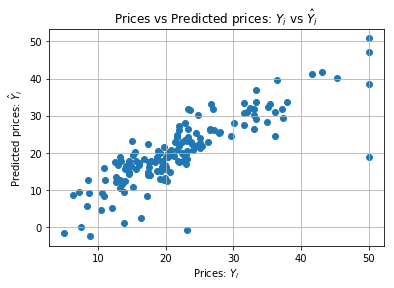

In [25]:
import matplotlib.pyplot as plt
weights, bias = SGD_fit(x_train,n_iter = 500,k_sample = 160, learning_rate = 0.001)
sgd_pred = SGD_predict(x_test,weights,bias)
plt.scatter(y_test, sgd_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid()
plt.show()


In [26]:
x_train = x_train.drop(["PRICE"],axis = 1)

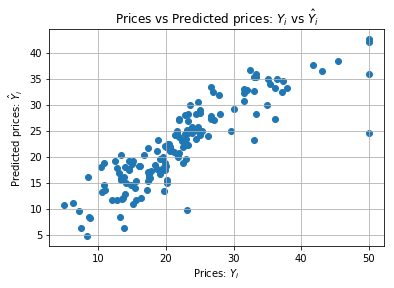

In [27]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid()
plt.show()

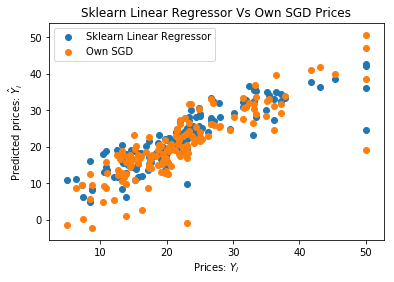

In [28]:
plt.scatter(y_test, y_pred,label= "Sklearn Linear Regressor")
plt.scatter(y_test, sgd_pred,label= "Own SGD")
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Sklearn Linear Regressor Vs Own SGD Prices")
plt.legend()
plt.show()

In [29]:
print(x_train.shape,y_train.shape)
print(x_test.shape,  y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


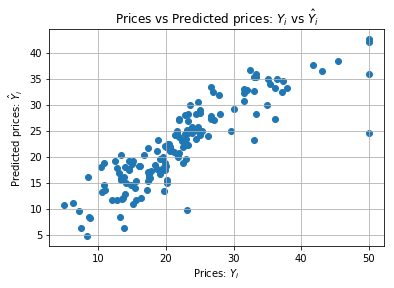

In [30]:
#SGDClassifier : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

from sklearn import linear_model

clf = linear_model.SGDClassifier()
y_train=y_train.astype('int') #https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown
clf.fit(x_train, y_train)
y_pred_SGD = lm.predict(x_test)

plt.scatter(y_test, y_pred_SGD)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid()
plt.show()

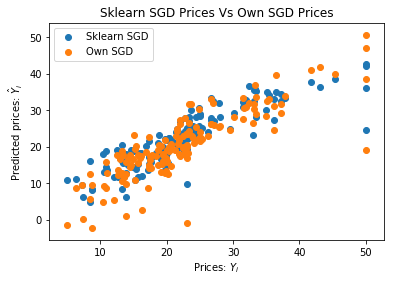

In [31]:
plt.scatter(y_test, y_pred_SGD,label= "Sklearn SGD")
plt.scatter(y_test, sgd_pred,label= "Own SGD")
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Sklearn SGD Prices Vs Own SGD Prices")
plt.legend()
plt.show()

In [32]:
def mean_sq_err(x,y):
    n = x.shape[0]
    sum = 0
    for i in range(n):
        sum = sum + (x[i]-y[i])**2
    return sum/n



In [48]:
float(mean_sq_err(y_test.values.flatten(),sgd_pred))
print("The Mean Square Error with the own SGD implementation is {}".format(float(mean_sq_err(y_test.values.flatten(),sgd_pred))))
print("The Mean Square Error with the Sklearn SGD implementation is {}".format(float(mean_sq_err(y_test.values.flatten(),y_pred_SGD))))

The Mean Square Error with the own SGD implementation is 32.80777533394785
The Mean Square Error with the Sklearn SGD implementation is 30.690888312444073


In [49]:
from tabulate import tabulate

data = []
sgd_w = clf.coef_[len(clf.coef_)-1]
weights = list(np.array(weights).flat)
sgd_w = list(sgd_w)
df = pd.DataFrame(columns = ["Sklearn SGD Weights","Own SGD Weights"])
df['Sklearn SGD Weights'] = sgd_w
df["Own SGD Weights"] = weights
df

,Sklearn SGD Weights,Own SGD Weights
0,-0.239850,-1.797788
1,16.082973,0.151236
2,10.639612,-0.813977
3,11.801910,0.767562
4,-28.247347,0.655959
5,4.197342,4.766484
6,9.121758,0.616827
7,-32.856862,-1.226966
8,17.251013,0.053155
9,-0.003303,-0.698894
